In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('TensorFlow_FILES/DATA/stroke_data.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [4]:
#Before we start checking correlations we can change text data to numeric
#First we check if we are cheking more than one gender in our database
df.value_counts('gender')

gender
Female    17852
Male      11213
dtype: int64

In [5]:
#Dataset only shows 2 genders so we can use this condition
conditions = [df['gender']=='Male',df['gender']=='Female']

values = [0,1]

df['female'] = np.select(conditions, values)
df.drop('gender',axis=1,inplace=True)
df.head(10)

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,female
0,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,0
1,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,1
2,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,1
3,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,1
4,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0,1
5,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0,1
6,79.0,0,1,Yes,Private,Urban,57.08,22.0,formerly smoked,0,0
7,37.0,0,0,Yes,Private,Rural,162.96,39.4,never smoked,0,1
8,37.0,0,0,Yes,Private,Rural,73.50,26.1,formerly smoked,0,1
9,40.0,0,0,Yes,Private,Rural,95.04,42.4,never smoked,0,1


In [6]:
#We do the same with ever_married
df.value_counts('ever_married')

ever_married
Yes    21687
No      7378
dtype: int64

In [7]:
conditions = [df['ever_married']=='Yes',df['ever_married']=='No']

values = [1,0]

df['ever_married'] = np.select(conditions,values)
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,female
0,58.0,1,0,1,Private,Urban,87.96,39.2,never smoked,0,0
1,70.0,0,0,1,Private,Rural,69.04,35.9,formerly smoked,0,1
2,52.0,0,0,1,Private,Urban,77.59,17.7,formerly smoked,0,1
3,75.0,0,1,1,Self-employed,Rural,243.53,27.0,never smoked,0,1
4,32.0,0,0,1,Private,Rural,77.67,32.3,smokes,0,1


In [8]:
df.value_counts('heart_disease')

heart_disease
0    27549
1     1516
dtype: int64

In [9]:
df.value_counts('Residence_type')

Residence_type
Urban    14592
Rural    14473
dtype: int64

In [10]:
conditions = [df['Residence_type']=='Urban',df['Residence_type']=='Rural']

values = [1,0]

df['urban_res'] = np.select(conditions,values)
df.drop('Residence_type',axis=1,inplace=True)
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,female,urban_res
0,58.0,1,0,1,Private,87.96,39.2,never smoked,0,0,1
1,70.0,0,0,1,Private,69.04,35.9,formerly smoked,0,1,0
2,52.0,0,0,1,Private,77.59,17.7,formerly smoked,0,1,1
3,75.0,0,1,1,Self-employed,243.53,27.0,never smoked,0,1,0
4,32.0,0,0,1,Private,77.67,32.3,smokes,0,1,0


In [11]:
df.value_counts('smoking_status')

smoking_status
never smoked       15746
formerly smoked     7093
smokes              6226
dtype: int64

In [12]:
dummies_smoking = pd.get_dummies(df['smoking_status'],drop_first=True)
df = pd.concat([df,dummies_smoking],axis=1)
df.drop('smoking_status', axis=1, inplace=True)
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,stroke,female,urban_res,never smoked,smokes
0,58.0,1,0,1,Private,87.96,39.2,0,0,1,1,0
1,70.0,0,0,1,Private,69.04,35.9,0,1,0,0,0
2,52.0,0,0,1,Private,77.59,17.7,0,1,1,0,0
3,75.0,0,1,1,Self-employed,243.53,27.0,0,1,0,1,0
4,32.0,0,0,1,Private,77.67,32.3,0,1,0,0,1


In [13]:
df.value_counts('work_type')

work_type
Private          18950
Self-employed     5204
Govt_job          4195
children           615
Never_worked       101
dtype: int64

In [14]:
#We assume children is a condition more related to age and not to work type. 
#We will consider children as never worked for this reason

conditions = [df['work_type']=='children',df['work_type']!='children']

values = ['Never_worked',df['work_type']]

df['work_type'] =  np.select(conditions, values)
df.value_counts('work_type')

work_type
Private          18950
Self-employed     5204
Govt_job          4195
Never_worked       716
dtype: int64

In [15]:
#Now we create dummies for these
dummies_work = pd.get_dummies(df['work_type'],drop_first=True)
df = pd.concat([df,dummies_work],axis=1)
df.drop('work_type', axis=1, inplace=True)
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,female,urban_res,never smoked,smokes,Never_worked,Private,Self-employed
0,58.0,1,0,1,87.96,39.2,0,0,1,1,0,0,1,0
1,70.0,0,0,1,69.04,35.9,0,1,0,0,0,0,1,0
2,52.0,0,0,1,77.59,17.7,0,1,1,0,0,0,1,0
3,75.0,0,1,1,243.53,27.0,0,1,0,1,0,0,0,1
4,32.0,0,0,1,77.67,32.3,0,1,0,0,1,0,1,0


In [16]:
df.value_counts('stroke')

stroke
0    28517
1      548
dtype: int64

In [17]:
#The final main problem of this data set is that we have way more values of people who have not have had a stroke
#than the opposite. Because the ratio is of no-stroke/total = 0.98, 
#a classification algorithm will just generate 0's. We will fix the problem by having them in the same proportion.

df_stroke = df[df['stroke']==1]
df_not = df[df['stroke']==0]

In [18]:
df_not = df_not.sample(frac=1).iloc[:548]
df_used = pd.concat([df_stroke,df_not],axis=0)
df_used = df_used.sample(frac=1)

In [19]:
df_not.sample(frac=1).iloc[:548]

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,female,urban_res,never smoked,smokes,Never_worked,Private,Self-employed
14719,82.0,0,0,1,94.39,26.2,0,1,1,1,0,0,1,0
21490,19.0,0,0,0,60.03,31.0,0,1,1,1,0,0,1,0
12424,45.0,0,0,1,217.75,31.5,0,1,0,1,0,0,1,0
11644,44.0,0,0,1,73.14,26.0,0,0,1,0,1,0,1,0
20293,75.0,0,1,1,110.86,25.1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21914,71.0,0,0,1,66.09,30.2,0,1,0,0,0,0,0,1
2099,38.0,0,0,1,80.82,49.3,0,1,0,1,0,0,1,0
7521,37.0,0,0,1,81.07,25.8,0,0,1,1,0,0,1,0
4498,63.0,0,0,1,56.26,57.0,0,1,1,1,0,0,0,1


In [20]:
df_not = df_not.sample(frac=1).iloc[:548]
df_used = pd.concat([df_stroke,df_not],axis=0)
df_used = df_used.sample(frac=1)

In [21]:
pd.set_option('display.max_columns', None)

df_used.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,female,urban_res,never smoked,smokes,Never_worked,Private,Self-employed
4280,79.0,0,0,1,93.05,24.2,1,1,0,1,0,0,1,0
11455,38.0,0,0,1,82.27,30.2,0,1,1,0,1,0,1,0
25492,79.0,1,1,0,78.28,33.8,1,0,0,1,0,0,1,0
2351,54.0,1,0,1,180.93,27.7,1,1,1,1,0,0,0,0
9668,21.0,0,0,0,106.57,33.1,0,1,0,0,1,0,0,0


In [22]:
df_used.value_counts('stroke')

stroke
0    548
1    548
dtype: int64

<AxesSubplot: xlabel='age', ylabel='Count'>

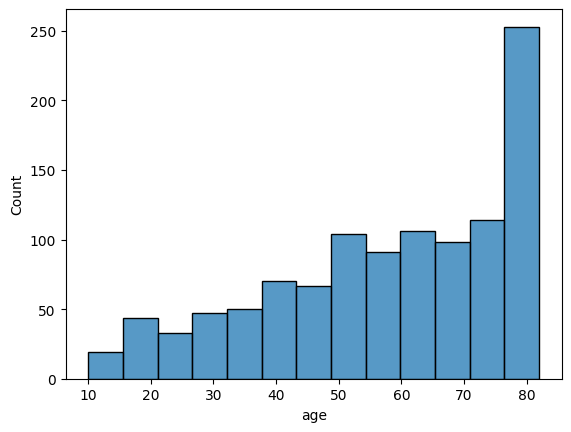

In [23]:
sns.histplot(df_used['age'])

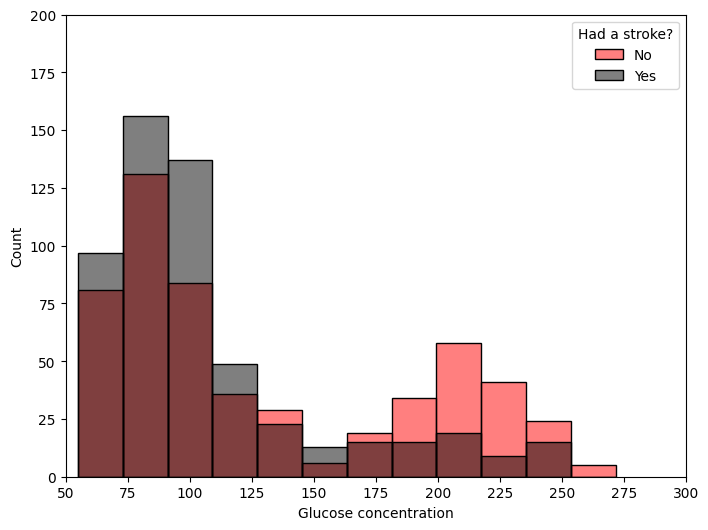

In [24]:
fig = plt.figure(figsize=[8,6])

ax = sns.histplot(x='avg_glucose_level', hue='stroke', data=df_used, stat='count', multiple='layer',palette=['black', 'red'], bins=12)
ax.set_ylim(top=200)
ax.set_xlim(left=50, right=300)
xticks = np.arange(50,301,25)
ax.set_xticks(xticks)
ax.set_xlabel('Glucose concentration')
ax.legend(['No','Yes'], title='Had a stroke?')

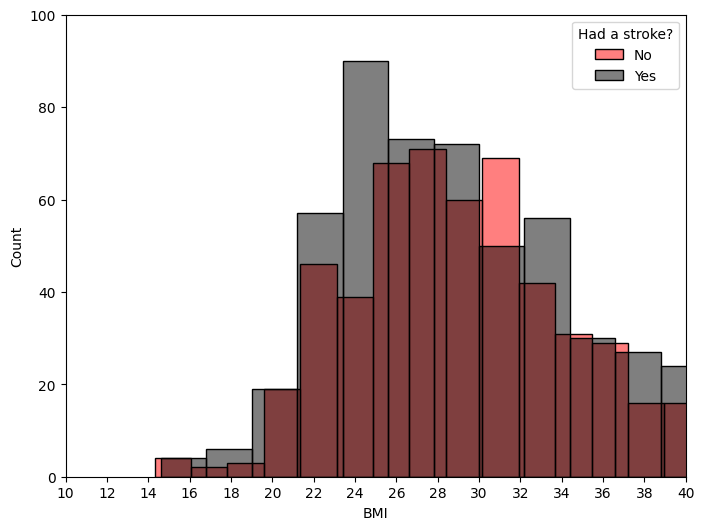

In [25]:
plt.figure(figsize=[8,6])
ax = sns.histplot(x='bmi', hue='stroke', data=df_used, stat='count', multiple='layer',palette=['black', 'red'], common_bins=False, alpha=0.5)
ax.set_ylim(top=100)
ax.set_xlim(left=12, right=40)
xticks = np.arange(10,41,2)
ax.set_xticks(xticks)
ax.set_xlabel('BMI')
ax.legend(['No','Yes'], title='Had a stroke?')

In [26]:
#We have a good distribution for all continuous factors that could be related with having a stroke

# Exploratory data analysis

In [27]:
df_used.corr()['stroke'].sort_values()

Never_worked        -0.129219
never smoked        -0.067518
female              -0.057723
Private             -0.053880
smokes              -0.013444
bmi                  0.003602
urban_res            0.018248
Self-employed        0.143284
ever_married         0.199209
avg_glucose_level    0.216096
heart_disease        0.254350
hypertension         0.261571
age                  0.559852
stroke               1.000000
Name: stroke, dtype: float64

In [28]:
#The factors that tend to have higher correlation with having a stroke seem to be:
#age, heart disease, avg_glucose_level, hypertension and ever_married. The last one seems kinda surprising!
#We can check if there is correlation with being married and having a not so good health too tho:
df_used.corr()['ever_married'].sort_values()

Never_worked        -0.275190
never smoked        -0.075032
female              -0.035371
smokes              -0.031734
Private             -0.001895
urban_res            0.028458
hypertension         0.049870
heart_disease        0.066504
Self-employed        0.068460
bmi                  0.080992
avg_glucose_level    0.123581
stroke               0.199209
age                  0.417022
ever_married         1.000000
Name: ever_married, dtype: float64

In [29]:
#On a tangent, maybe being married is not directly related to having a stroke, 
#but married people in this dataset were older and that has the highest correlation to having a stroke

#Now we check if other features were very unbalanced.

df_used.value_counts('hypertension')

hypertension
0    890
1    206
dtype: int64

In [30]:
df_used.value_counts('heart_disease')

heart_disease
0    949
1    147
dtype: int64

In [31]:
#Heart diseae is very unbalanced

# We start building our model now

In [32]:
X = np.array(df_used.drop('stroke',axis=1))
y = np.array(df_used['stroke'])

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
X_train = scaler.fit_transform(X_train)

In [38]:
X_test = scaler.transform(X_test)

## We start using a logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model_LR = LogisticRegression()

In [41]:
model_LR.fit(X_train, y_train)

LogisticRegression()

In [42]:
pred_LR = model_LR.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
rep_LR = classification_report(y_test,pred_LR)
print(rep_LR)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       155
           1       0.82      0.81      0.81       174

    accuracy                           0.80       329
   macro avg       0.80      0.80      0.80       329
weighted avg       0.80      0.80      0.80       329



## Using RandomForest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model_RF = RandomForestClassifier(n_estimators=200)

In [47]:
model_RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [48]:
pred_RF = model_RF.predict(X_test)

In [49]:
rep_RF = classification_report(y_test,pred_RF)
print(rep_RF)

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       155
           1       0.78      0.82      0.80       174

    accuracy                           0.78       329
   macro avg       0.78      0.78      0.78       329
weighted avg       0.78      0.78      0.78       329



## Using NN

In [50]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

2023-12-12 19:35:29.388626: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 19:35:29.388686: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 19:35:29.390884: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [96]:
model_NN = Sequential()

model_NN.add(Dense(13,activation='relu'))
model_NN.add(Dropout(rate=0.5))

model_NN.add(Dense(7,activation='relu'))
model_NN.add(Dropout(rate=0.5))

model_NN.add(Dense(1,activation='sigmoid'))

In [97]:
model_NN.compile(loss='binary_crossentropy', optimizer='adam')

In [98]:
from tensorflow.keras.callbacks import EarlyStopping

In [99]:
early_stop = EarlyStopping(monitor = 'val_loss', mode='min', patience=50)

In [100]:
model_NN.fit(x=X_train,y = y_train, epochs=500,callbacks= [early_stop],validation_data=(X_test,y_test))

Epoch 1/500
24/24 [==============================] - 1s 5ms/step - loss: 0.7200 - val_loss: 0.7027
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 0.7070 - val_loss: 0.6978
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 0.7044 - val_loss: 0.6944
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 0.7000 - val_loss: 0.6922
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 0.6936 - val_loss: 0.6911
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 0.6883 - val_loss: 0.6903
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6943 - val_loss: 0.6890
Epoch 8/500
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - val_loss: 0.6873
Epoch 9/500
24/24 [==============================] - 0s 3ms/step - loss: 0.6858 - val_loss: 0.6851
Epoch 10/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6833 - val_loss: 0.6819
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.5861 - val_loss: 0.5399
Epoch 84/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5696 - val_loss: 0.5393
Epoch 85/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5778 - val_loss: 0.5368
Epoch 86/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5685 - val_loss: 0.5363
Epoch 87/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5677 - val_loss: 0.5352
Epoch 88/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5768 - val_loss: 0.5337
Epoch 89/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5692 - val_loss: 0.5320
Epoch 90/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5864 - val_loss: 0.5359
Epoch 91/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5660 - val_loss: 0.5329
Epoch 92/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5795 - val_loss: 0.5356
Epoch 93/500


24/24 [==============================] - 0s 2ms/step - loss: 0.5574 - val_loss: 0.5157
Epoch 165/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5410 - val_loss: 0.5151
Epoch 166/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5377 - val_loss: 0.5136
Epoch 167/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5488 - val_loss: 0.5117
Epoch 168/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5331 - val_loss: 0.5112
Epoch 169/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5570 - val_loss: 0.5121
Epoch 170/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5491 - val_loss: 0.5123
Epoch 171/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5451 - val_loss: 0.5108
Epoch 172/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5626 - val_loss: 0.5136
Epoch 173/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5224 - val_loss: 0.5117
Epoc

24/24 [==============================] - 0s 3ms/step - loss: 0.5255 - val_loss: 0.5020
Epoch 246/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5373 - val_loss: 0.5024
Epoch 247/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5495 - val_loss: 0.5039
Epoch 248/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5253 - val_loss: 0.5048
Epoch 249/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5249 - val_loss: 0.5036
Epoch 250/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5216 - val_loss: 0.5034
Epoch 251/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5244 - val_loss: 0.5038
Epoch 252/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5490 - val_loss: 0.5071
Epoch 253/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5455 - val_loss: 0.5064
Epoch 254/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5216 - val_loss: 0.5041
Epoc

In [101]:
losses = pd.DataFrame(model_NN.history.history)

<AxesSubplot: >

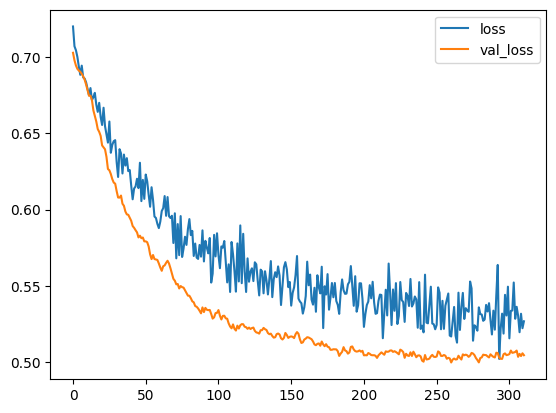

In [102]:
losses.plot()

In [103]:
pred_NN = model_NN.predict(X_test)

11/11 [==============================] - 0s 1ms/step


In [104]:
pred_NN.shape

(329, 1)

In [105]:
def convert2pred(pred):
    
    for i in range(len(pred)):
        if pred[i]<0.5:
            pred[i]=0
        else:
            pred[i]=1
    return pred

In [106]:
pred_NN = convert2pred(pred_NN)

In [107]:
rep_NN = classification_report(y_test,pred_NN)
print(rep_NN)

              precision    recall  f1-score   support

           0       0.81      0.69      0.75       155
           1       0.76      0.86      0.80       174

    accuracy                           0.78       329
   macro avg       0.78      0.77      0.77       329
weighted avg       0.78      0.78      0.78       329



# Comparing results 

In [108]:
print('Logistic Regression')
print(rep_LR)
print('Random Forest')
print(rep_RF)
print('Neural Network')
print(rep_NN)

Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       155
           1       0.82      0.81      0.81       174

    accuracy                           0.80       329
   macro avg       0.80      0.80      0.80       329
weighted avg       0.80      0.80      0.80       329

Random Forest
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       155
           1       0.78      0.82      0.80       174

    accuracy                           0.78       329
   macro avg       0.78      0.78      0.78       329
weighted avg       0.78      0.78      0.78       329

Neural Network
              precision    recall  f1-score   support

           0       0.81      0.69      0.75       155
           1       0.76      0.86      0.80       174

    accuracy                           0.78       329
   macro avg       0.78      0.77      0.77       329
weighted avg       0.78  

## For this kind of problem we are interested in the metric that is able to diagnose most people having a stroke as possible so we can save more lives. False positives are not as bad. Because of that the recall measurement is the most important

# This means that the recall is the most important measurement for this

# In that sense, the models did really similar nue neural network did best